### Student Information
Name: 游睿騏

Student ID: 114062635

GitHub ID:

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [39]:
### Begin Assignment Here

# test code for environment setup
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') # download the NLTK datasets
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
# If you get "ModuleNotFoundError: No module named 'PAMI'"
# run the following in a new Jupyter cell:
# !pip3 install PAMI
import PAMI
import umap
import my_helpers.data_mining_helpers as dmh
import sys
import matplotlib.pyplot as plt
import seaborn as sns

# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2
%matplotlib inline

print(sys.executable) # c:\<your path to the project directory>\.venv\Scripts\python.exe
print(sys.version) #3.11.0

nltk.download("punkt")
nltk.download("punkt_tab")
nltk.download('stopwords')
nltk.download('wordnet')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/Users/rcu0613/Desktop/清華大學/Data Mining/Lab1/DM2025-Lab1-Exercise/.venv/bin/python
3.11.0 (v3.11.0:deaf509e8f, Oct 24 2022, 14:43:23) [Clang 13.0.0 (clang-1300.0.29.30)]


[nltk_data] Downloading package punkt to /Users/rcu0613/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to /Users/rcu0613/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/rcu0613/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rcu0613/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/rcu0613/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [40]:
df = pd.read_csv('newdataset/Reddit-stock-sentiment.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          847 non-null    object 
 1   datetime      847 non-null    object 
 2   post_id       847 non-null    object 
 3   subreddit     847 non-null    object 
 4   title         847 non-null    object 
 5   author        847 non-null    object 
 6   url           847 non-null    object 
 7   upvotes       847 non-null    int64  
 8   downvotes     64 non-null     float64
 9   upvote_ratio  64 non-null     float64
 10  text          847 non-null    object 
 11  subjectivity  847 non-null    float64
 12  polarity      847 non-null    float64
 13  sentiment     847 non-null    float64
 14  entities      847 non-null    object 
 15  label         847 non-null    float64
dtypes: float64(6), int64(1), object(9)
memory usage: 106.0+ KB


In [41]:
print(df.shape)
print()
print(df.columns)
print()
print(df.head)

(847, 16)

Index(['type', 'datetime', 'post_id', 'subreddit', 'title', 'author', 'url',
       'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity',
       'polarity', 'sentiment', 'entities', 'label'],
      dtype='object')

<bound method NDFrame.head of         type             datetime  post_id         subreddit  \
0    comment  2025-04-11 17:29:56  mmli62w    wallstreetbets   
1    comment   2025-04-12 1:12:19  mmnu7v9    wallstreetbets   
2    comment  2025-04-10 15:09:41  mmeevio       StockMarket   
3       post  2023-08-30 17:12:55  165kllm  stockstobuytoday   
4    comment  2025-04-11 14:48:05  mmkl6bw       StockMarket   
..       ...                  ...      ...               ...   
842  comment   2021-06-30 4:06:06  h3iv6pq  stockstobuytoday   
843  comment   2025-04-11 5:01:24  mmijiuz       StockMarket   
844     post  2025-03-24 12:30:39  1jipi4v  stockstobuytoday   
845  comment  2025-04-11 20:13:26  mmmely7    wallstreetbets   
846  comment   2025-04-12 3:09

### **>>> Exercise 1:**  
In this exercise, please print out the *text* data for the first three samples in the dataset. (See the above code for help)

In [42]:
for i in range(3):
    print(f"example {i+1}")
    print(df.text[i])

example 1
Calls on retards
example 2
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.
example 3
Seeing lots of red in the ticker.


In [65]:
reddit = pd.DataFrame.from_records(dmh.format_rows(df), columns=['text'])
reddit['upvotes'] = df['upvotes']
reddit['sentiment'] = df['sentiment']
reddit['subreddit'] = df['subreddit']
reddit['label'] = df['label']
reddit['datetime'] = df['datetime']
reddit['subjectivity'] = df['subjectivity']
reddit['text_length'] = reddit['text'].str.len()

reddit

,text,upvotes,sentiment,subreddit,label,datetime,subjectivity,text_length
0,Calls on retards,0,-1.0,wallstreetbets,-1.0,2025-04-11 17:29:56,1.000000,16
1,Stunt as in like why did they even make a big ...,-15,1.0,wallstreetbets,0.0,2025-04-12 1:12:19,0.177778,137
2,Seeing lots of red in the ticker.,1,0.0,StockMarket,0.0,2025-04-10 15:09:41,0.000000,33
3,Vision Marine Technologies Inc. is rewriting t...,30,1.0,stockstobuytoday,1.0,2023-08-30 17:12:55,0.646970,1067
4,He didn’t say thank you.,1,0.0,StockMarket,-1.0,2025-04-11 14:48:05,0.000000,24
...,...,...,...,...,...,...,...,...
842,Invest now it is going to shoot up tomorrow,1,0.0,stockstobuytoday,1.0,2021-06-30 4:06:06,0.000000,43
843,Where can I read this?,2,0.0,StockMarket,0.0,2025-04-11 5:01:24,0.000000,22
844,"Upgrades, Downgrades [Stock Analyst Recommen...",1,0.0,stockstobuytoday,0.0,2025-03-24 12:30:39,0.000000,89
845,i sold my puts so i expect cheeto to declare w...,10,0.0,wallstreetbets,-1.0,2025-04-11 20:13:26,0.000000,59


### **>>> Exercise 3:**

In [6]:
reddit[reddit['sentiment']==1.0][::10][:5]

,text,upvotes,sentiment,subreddit
1,Stunt as in like why did they even make a big ...,-15,1.0,wallstreetbets
25,"You see, Target, pissing off a good chunk of y...",4,1.0,wallstreetbets
56,"To be fair, Chinese exports to the US make up ...",-1,1.0,stocks
73,"Look, the USA somehow thought a second term f...",1,1.0,stocks
96,200k loss in a month.. haha,1,1.0,wallstreetbets


In [7]:
df.isnull().apply(lambda x: dmh.check_missing_values(x))

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,0,0,0,0,783,783,0,0,0,0,0,0


### >>> **Exercise 4:** 
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.  
$Hint$ : `axis` parameter. Check the documentation for more information.

In [8]:
df.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0      (The amoung of missing records is: , 2)
1      (The amoung of missing records is: , 2)
2      (The amoung of missing records is: , 2)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 2)
                        ...                   
842    (The amoung of missing records is: , 2)
843    (The amoung of missing records is: , 2)
844    (The amoung of missing records is: , 0)
845    (The amoung of missing records is: , 2)
846    (The amoung of missing records is: , 2)
Length: 847, dtype: object

### >>> **Exercise 7:**
Notice that for the `ylim` parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

<Axes: title={'center': 'Subreddit distribution'}, xlabel='subreddit'>

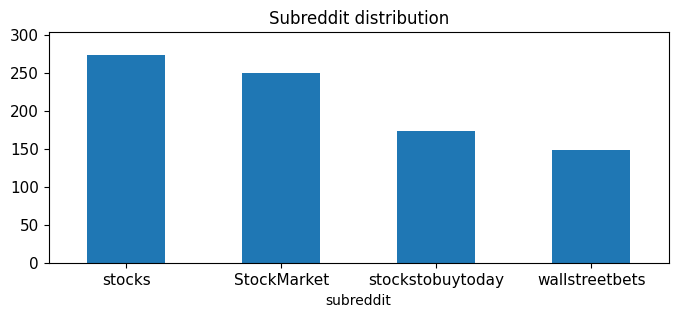

In [9]:
reddit.subreddit.value_counts().plot(kind = 'bar',
                                    title = 'Subreddit distribution',
                                    ylim = [0, reddit.subreddit.value_counts().max()+30],
                                    rot = 0, fontsize = 11, figsize = (8,3))

### >>> **Exercise 8:**
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

<Axes: title={'center': 'Category distribution'}, xlabel='subreddit'>

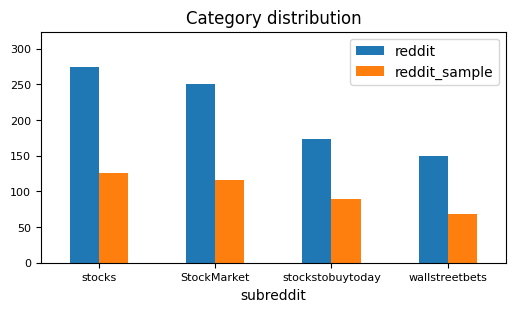

In [10]:
reddit_sample = reddit.sample(n = 400)

counts_reddit = reddit.subreddit.value_counts()
counts_sample = reddit_sample.subreddit.value_counts()

df_compare = pd.DataFrame({
    "reddit": counts_reddit,
    "reddit_sample": counts_sample
})

df_compare.plot(kind = 'bar',
                title = 'Category distribution',
                ylim = [0, reddit.subreddit.value_counts().max()+50], 
                rot = 0, fontsize = 8, figsize=(6,3))

In [11]:
reddit['unigrams'] = df['text'].apply(lambda x: dmh.tokenize_text(x))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rcu0613/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rcu0613/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rcu0613/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rcu0613/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rcu0613/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rcu0613/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rcu0613/nltk_data...
[nltk_data]   Package stopwords is already up-t

In [12]:
list(reddit[1:2]['unigrams'])

[['stunt',
  'as',
  'in',
  'like',
  'why',
  'did',
  'they',
  'even',
  'make',
  'a',
  'big',
  'deal',
  'about',
  'starting',
  'it',
  'in',
  'the',
  'first',
  'place',
  '?',
  'no',
  'company',
  'should',
  'ever',
  'talk',
  'about',
  'politics',
  'ever',
  '.']]

In [22]:
reddit['unigrams'] = reddit['text'].apply(lambda x: dmh.tokenize_text(x, remove_stopwords=True))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rcu0613/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rcu0613/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rcu0613/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rcu0613/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rcu0613/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rcu0613/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rcu0613/nltk_data...
[nltk_data]   Package stopwords is already up-t

In [23]:
list(reddit[1:2]['unigrams'])

[['stunt',
  'like',
  'even',
  'make',
  'big',
  'deal',
  'starting',
  'first',
  'place',
  'company',
  'talk',
  'politics']]

In [24]:
def clean_tokens(tokens):
    return [w for w in tokens if w.isalpha()]  # keeps only pure letters

reddit['unigrams'] = reddit['unigrams'].apply(clean_tokens)

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
reddit_text = reddit['unigrams'].apply(lambda x: " ".join(x))
reddit_counts = count_vect.fit_transform(reddit_text)
print(reddit_counts[1])

  (np.int32(0), np.int32(3205))	1
  (np.int32(0), np.int32(1935))	1
  (np.int32(0), np.int32(1125))	1
  (np.int32(0), np.int32(2021))	1
  (np.int32(0), np.int32(312))	1
  (np.int32(0), np.int32(835))	1
  (np.int32(0), np.int32(3140))	1
  (np.int32(0), np.int32(1274))	1
  (np.int32(0), np.int32(2448))	1
  (np.int32(0), np.int32(649))	1
  (np.int32(0), np.int32(3292))	1
  (np.int32(0), np.int32(2486))	1


In [26]:
analyze = count_vect.build_analyzer()

In [27]:
count_vect.get_feature_names_out()[0:20]

array(['aapl', 'ability', 'able', 'abolish', 'absolute', 'abuse',
       'abusing', 'abysmal', 'accelerate', 'accept', 'acceptable',
       'accepted', 'access', 'according', 'account', 'accretive', 'acct',
       'accurate', 'aces', 'achieved'], dtype=object)

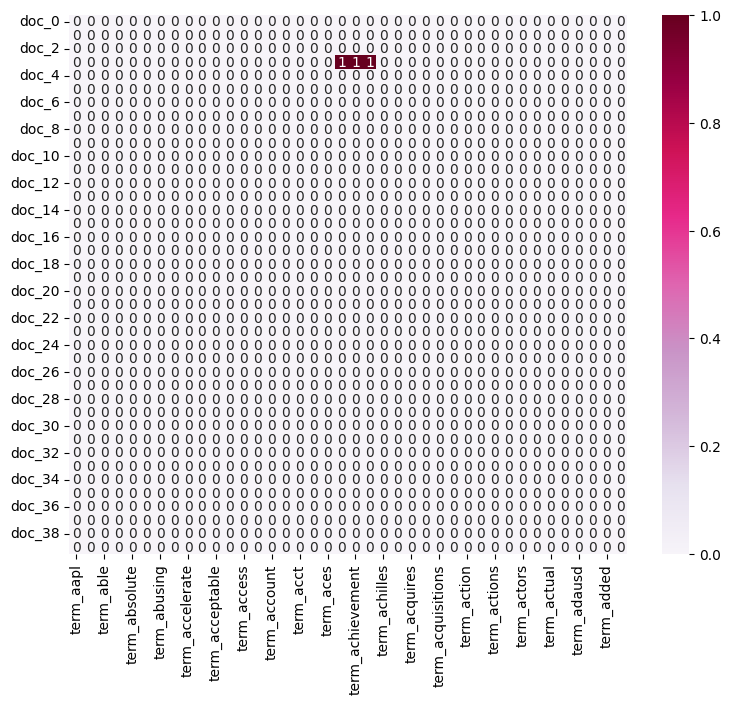

In [28]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:40]]
plot_y = ["doc_"+ str(i) for i in list(reddit.index)[0:40]]
plot_z = reddit_counts[0:40, 0:40].toarray() #X_counts[how many documents, how many terms]

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)


### **>>> Exercise 11:**
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with **FREQUENCY** of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

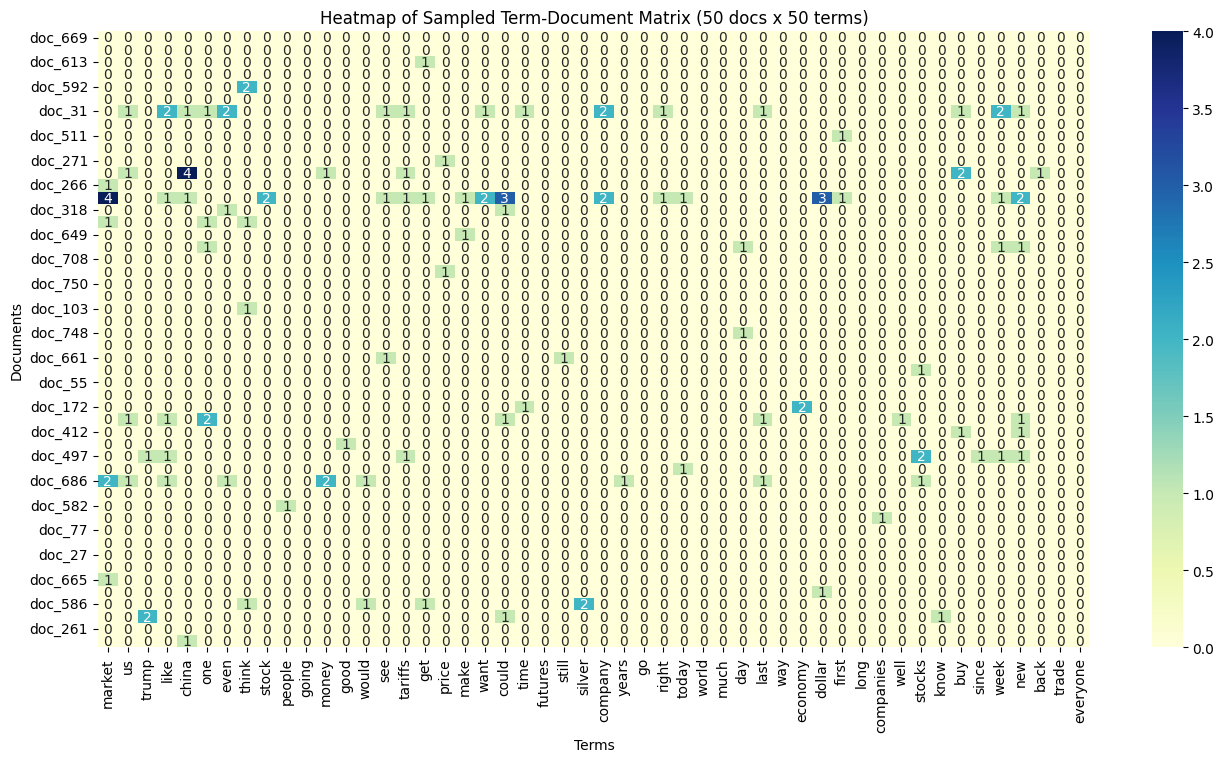

In [29]:
# Select top 50 most frequent terms
term_frequencies = np.array(reddit_counts.sum(axis=0)).flatten()
top_term_indices = term_frequencies.argsort()[-50:][::-1]
top_terms = count_vect.get_feature_names_out()[top_term_indices]

# Randomly sample 50 documents
np.random.seed(0)
doc_indices = np.random.choice(reddit_counts.shape[0], 50, replace=False)
sample_docs = [f"doc_{i}" for i in doc_indices]

# Extract the submatrix
submatrix = reddit_counts[doc_indices][:, top_term_indices].toarray()

# Create DataFrame for plotting
df_sample = pd.DataFrame(submatrix, columns=top_terms, index=sample_docs)

plt.figure(figsize=(16, 8))
sns.heatmap(df_sample, cmap="YlGnBu", vmin=0, vmax=submatrix.max(), annot=True)
plt.title("Heatmap of Sampled Term-Document Matrix (50 docs x 50 terms)")
plt.xlabel("Terms")
plt.ylabel("Documents")
plt.show()

In [30]:
term_frequencies = []
for j in range(0,reddit_counts.shape[1]):
    term_frequencies.append(sum(reddit_counts[:,j].toarray()))

In [31]:
term_frequencies = np.asarray(reddit_counts.sum(axis=0))[0]
term_frequencies[0]

np.int64(3)

/var/folders/b3/2m0v38w15_38js621qqz39w80000gn/T/ipykernel_9306/3480579971.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);


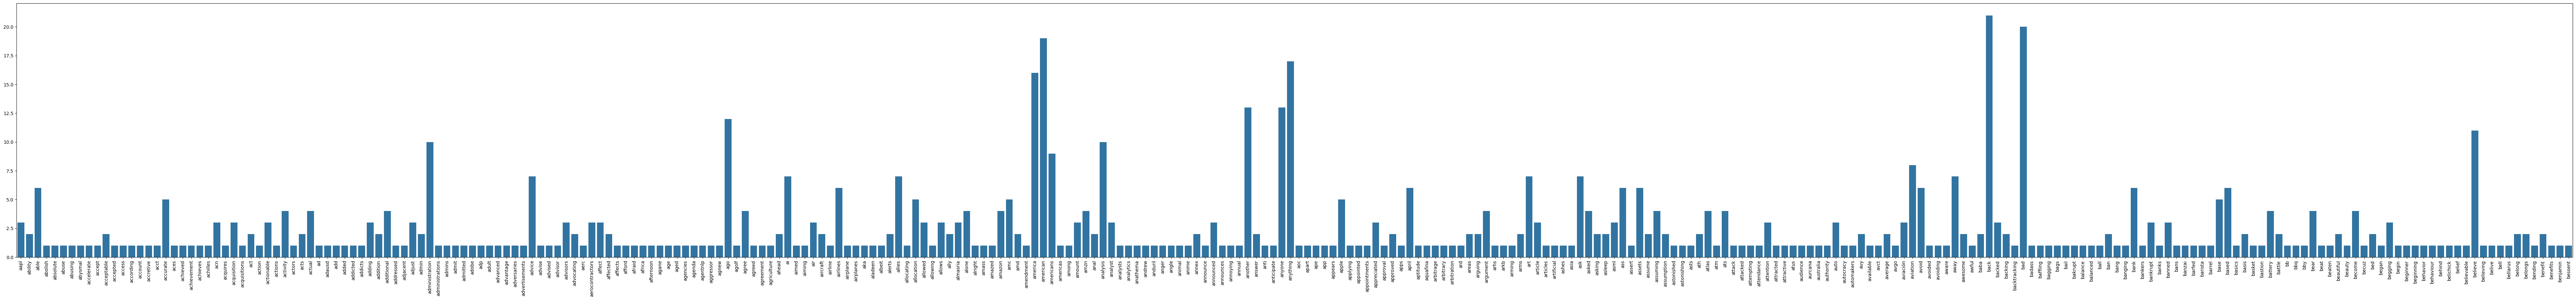

In [32]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

### >>> **Exercise 12:**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [33]:
# Answer here
import plotly.express as px

fig = px.bar(
    x=count_vect.get_feature_names_out()[:300],
    y=term_frequencies[:300],
    labels={'x': 'Term', 'y': 'Frequency'},
    title='Term Frequencies (Top 300 Terms)'
)
fig.update_layout(xaxis_tickangle=90, width=1200, height=400)
fig.show()

### >>> **Exercise 13:** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


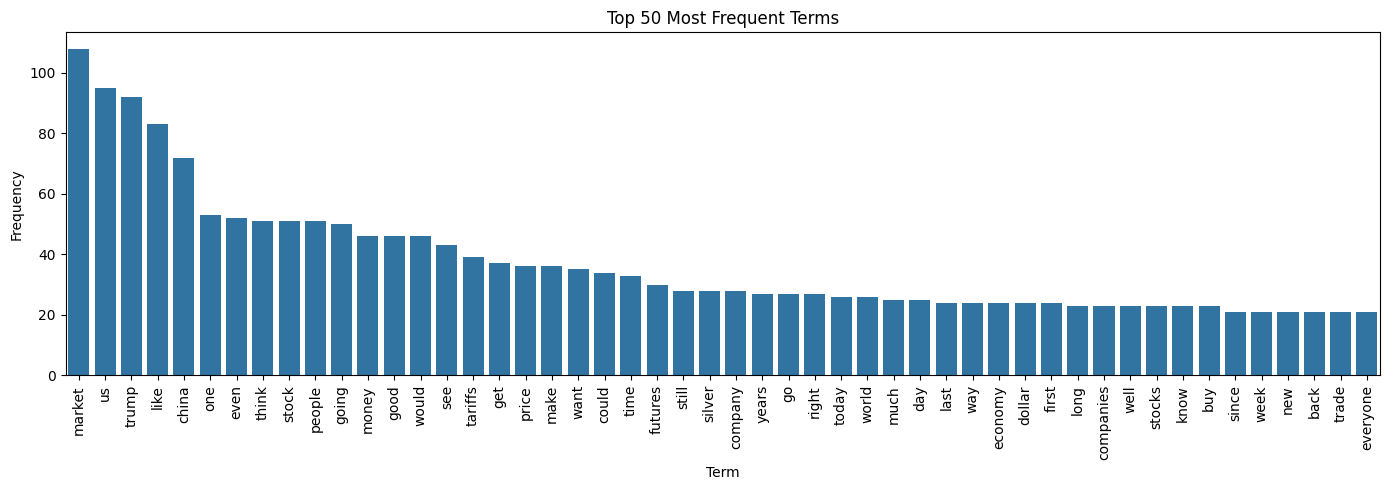

In [34]:
# Select top 50 most frequent terms for visualization
top_k = 50
top_indices = term_frequencies.argsort()[-top_k:][::-1]
top_terms = count_vect.get_feature_names_out()[top_indices]
top_freqs = term_frequencies[top_indices]

plt.figure(figsize=(14, 5))
sns.barplot(x=top_terms, y=top_freqs)
plt.xticks(rotation=90)
plt.title(f"Top {top_k} Most Frequent Terms")
plt.xlabel("Term")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

### >>> **Exercise 14:** 

In [35]:
import plotly.graph_objects as go

term_freq = np.asarray(reddit_counts.sum(axis=0)).ravel()
terms = count_vect.get_feature_names_out()

# Build & sort dataframe
df = pd.DataFrame({'term': terms, 'freq': term_freq}).sort_values('freq', ascending=False, ignore_index=True)

# df already sorted descending by 'freq'
df['rank'] = np.arange(1, len(df) + 1)

fig = go.Figure([
    go.Scattergl(
        x=df['rank'],
        y=df['freq'],
        mode="lines+markers",
        hovertemplate="rank=%{x}<br>freq=%{y}<extra></extra>",
        name="All terms"
    )
])

head = df.head(20)

k = min(300, len(df))
fig = go.Figure(go.Bar(
    x=df['term'].head(k),
    y=df['freq'].head(k),
))
fig.update_layout(
    title=f"Top {k} Terms (Log Frequency)",
    xaxis_title="Term",
    yaxis_title="Frequency (log)",
    template="plotly_white",
    height=600,
    margin=dict(l=40, r=20, t=80, b=120)
)
fig.show()



### >>> **Exercise 15:** 
You can copy the code from the previous exercise and change the 'term_frequencies' variable for the 'term_frequencies_log', comment about the differences that you observe and talk about other possible insights that we can get from a log distribution.

In [36]:
import plotly.graph_objects as go

term_freq = np.asarray(reddit_counts.sum(axis=0)).ravel()
terms = count_vect.get_feature_names_out()

# Build & sort dataframe
df = pd.DataFrame({'term': terms, 'freq': term_freq}).sort_values('freq', ascending=False, ignore_index=True)

# df already sorted descending by 'freq'
df['rank'] = np.arange(1, len(df) + 1)

k = min(300, len(df))
fig = go.Figure(go.Bar(
    x=df['term'].head(k),
    y=df['freq'].head(k),
))
fig.update_yaxes(type="log")
fig.update_layout(
    title=f"Top {k} Terms (Log Frequency)",
    xaxis_title="Term",
    yaxis_title="Frequency (log)",
    template="plotly_white",
    height=600,
    margin=dict(l=40, r=20, t=80, b=120)
)
fig.show()

## **Simple Sentiment Distribution**

<Axes: title={'center': 'Sentiment Distribution'}, xlabel='label'>

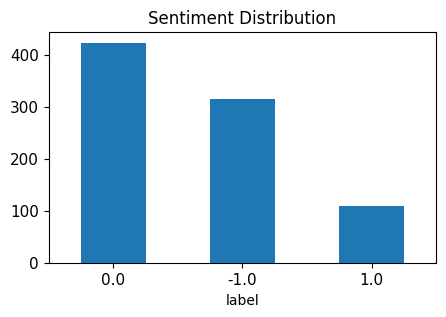

In [57]:
reddit['label'].value_counts().plot(kind='bar', title='Sentiment Distribution', figsize=(5,3), rot=0, fontsize=11)

## **Distribution of Subjectivity Across Sentiment Labels**

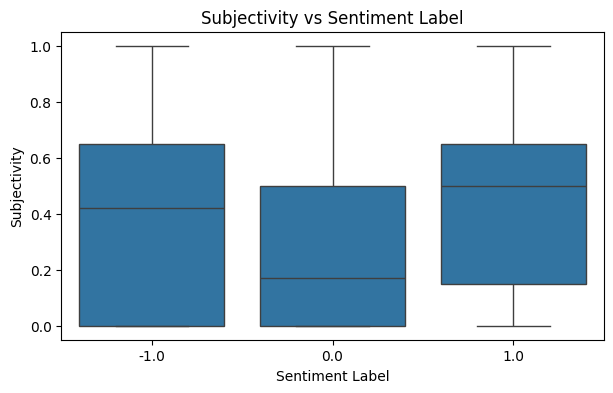

This plot shows: People expressing positive sentiment tend to write in a more personal/emotional style.


In [63]:
plt.figure(figsize=(7, 4))
sns.boxplot(x='label', y='subjectivity', data=reddit)
plt.title('Subjectivity vs Sentiment Label')
plt.xlabel('Sentiment Label')
plt.ylabel('Subjectivity')
plt.show()
print('This plot shows: People expressing positive sentiment tend to write in a more personal/emotional style.')

## **Text Length vs Sentiment (Without outliers)**
### What it Shows:
Negative sentiment → longer, more elaborate comments.

Neutral sentiment → shortest comments (factual/objective).

Positive sentiment → in-between, often brief but sometimes expressive.

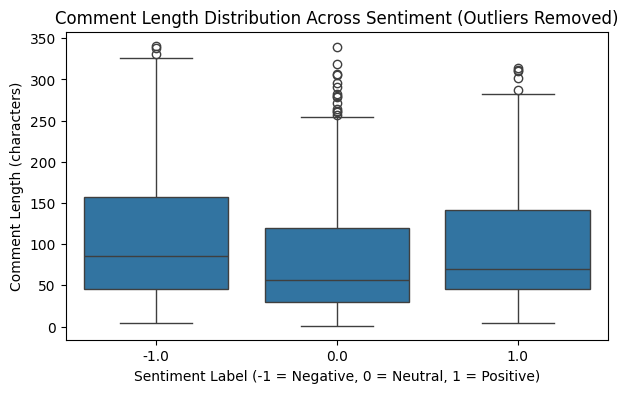

In [69]:
Q1 = reddit['text_length'].quantile(0.25)
Q3 = reddit['text_length'].quantile(0.75)
IQR = Q3 - Q1

# Keep only non-outliers
reddit_no_outliers = reddit[
    (reddit['text_length'] >= Q1 - 1.5*IQR) & 
    (reddit['text_length'] <= Q3 + 1.5*IQR)
]

plt.figure(figsize=(7, 4))
sns.boxplot(x='label', y='text_length', data=reddit_no_outliers)
plt.title('Comment Length Distribution Across Sentiment (Outliers Removed)')
plt.xlabel('Sentiment Label (-1 = Negative, 0 = Neutral, 1 = Positive)')
plt.ylabel('Comment Length (characters)')
plt.show()

# Phase 2

In [ ]:
### Begin Assignment Here